# Adding contour lines to a heat map

Here will will add contour lines to a heat map.

We'll use something a little more interesting for the array of values, we'll define a Mandlebrot fractal function. We have build a 1,000 and 1,000 array and calculate z as a Mandlebrot function of x and y.

The heatmap is drawn with plt.imshow, and then contour lines are added with plt.contour.

See if you can follow how the arrays are built up, and the Mandlebrot function used to calculate Z, but the main purpose is to deomstrate adding contour lines to a heat map.

The Mandlebrot function may take up to 30 seconds to calculate (maybe longer on an old computer).

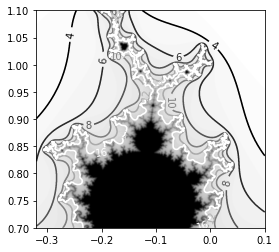

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

# Mandlebrot function - a fractal

def iter_count(c,max_iter):
    x=c
    for n in range(max_iter):
        if abs(x)>2:
            return (n)
        x=x**2+c
    return (max_iter)

# Build a 512 * 512 array of x, y
    
n=1000
max_iter=75
# xmin,xmax,ymin,ymax = -0.32,0,0.8,01.1
xmin,xmax,ymin,ymax = -0.32,0.1,0.7,1.1
x_series=np.linspace(xmin,xmax,n)
y_series=np.linspace(ymin,ymax,n)

# Create an empty array for z (which will calculated from all x and y)

z=np.empty((n,n))

# Calculate z based on the Mandlebrot function

for i,y in enumerate(y_series):
    for j,x in enumerate(x_series):
        z[i,j]=iter_count(complex(x,y),max_iter)
        
# THE CHART

# Show a grey scale heatmap with imshow        

plt.imshow(z,
           cmap=cm.binary,
           interpolation='bicubic',
           origin='lower',
           extent=(xmin,xmax,ymin,ymax))

# Extent (above) defines the axes values which are not held in the
# results array (z) itself

# Add contours

levels=[2, 4, 6, 8, 10, 12, 14, 16] # Define levels 

ct=plt.contour(x_series,y_series,z,levels,cmap=cm.gray) 

# Add contour labels

plt.clabel(ct,fmt='%d')

plt.show()